In [302]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [303]:
train_df = pd.read_csv('train_dataset.csv')
test_df = pd.read_csv('test_dataset.csv')

In [304]:
def preprocess_weather_data(df):
    # -9999를 NaN으로 변환
    df.replace(-9999, np.nan, inplace=True)

    # 1. cloud_cover_n: 결측치는 0으로 대체
    cloud_cols = [col for col in df.columns if col.startswith('cloud_cover_')]
    df[cloud_cols] = df[cloud_cols].fillna(0)

    # 2. dew_point_n: 행별 평균으로 결측치 대체
    dew_cols = [col for col in df.columns if col.startswith('dew_point_')]
    row_mean_dew = df[dew_cols].mean(axis=1)
    for col in dew_cols:
        df[col] = df[col].fillna(row_mean_dew)

    # 3. humidity_n: 행별 평균으로 결측치 대체
    humidity_cols = [col for col in df.columns if col.startswith('humidity_')]
    row_mean_humidity = df[humidity_cols].mean(axis=1)
    for col in humidity_cols:
        df[col] = df[col].fillna(row_mean_humidity)

    # 4. local_pressure_n: 행별 평균으로 결측치 대체
    pressure_cols = [col for col in df.columns if col.startswith('local_pressure_')]
    row_mean_pressure = df[pressure_cols].mean(axis=1)
    for col in pressure_cols:
        df[col] = df[col].fillna(row_mean_pressure)

    # 5. min_cloud_height_n: 관련 컬럼 모두 삭제 >> 아래 그래프 참고
    min_cloud_cols = [col for col in df.columns if col.startswith('min_cloud_height_')]
    df = df.drop(columns=min_cloud_cols)

    # 6. precipitation_n: 결측치는 0으로 대체
    precipitation_cols = [col for col in df.columns if col.startswith('precipitation_')]
    df[precipitation_cols] = df[precipitation_cols].fillna(0)

    # 7. sea_level_pressure_n: 행별 평균으로 결측치 대체
    sea_level_cols = [col for col in df.columns if col.startswith('sea_level_pressure_')]
    row_mean_sea_level = df[sea_level_cols].mean(axis=1)
    for col in sea_level_cols:
        df[col] = df[col].fillna(row_mean_sea_level)

    # 8. snow_depth_n: 결측치는 0으로 대체
    snow_cols = [col for col in df.columns if col.startswith('snow_depth_')]
    df[snow_cols] = df[snow_cols].fillna(0)

    # 9. sunshine_duration_n: 결측치는 0으로 대체
    sunshine_cols = [col for col in df.columns if col.startswith('sunshine_duration_')]
    df[sunshine_cols] = df[sunshine_cols].fillna(0)

    # 10. surface_temp_n: 지면온도 행별 평균으로 결측치 대체
    surface_temp_cols = [col for col in df.columns if col.startswith('surface_temp_')]
    row_mean_surface_temp = df[surface_temp_cols].mean(axis=1)
    for col in surface_temp_cols:
        df[col] = df[col].fillna(row_mean_surface_temp)

    # 11. vapor_pressure_n: 증기압 행별 평균으로 결측치 대체
    vapor_pressure_cols = [col for col in df.columns if col.startswith('vapor_pressure_')]
    row_mean_vapor_pressure = df[vapor_pressure_cols].mean(axis=1)
    for col in vapor_pressure_cols:
        df[col] = df[col].fillna(row_mean_vapor_pressure)

    # 12. visibility_n: 시정 행별 평균으로 결측치 대체
    visibility_cols = [col for col in df.columns if col.startswith('visibility_')]
    row_mean_visibility = df[visibility_cols].mean(axis=1)
    for col in visibility_cols:
        df[col] = df[col].fillna(row_mean_visibility)

    # 13. wind_speed_n: 풍속 행별 평균으로 결측치 대체
    wind_speed_cols = [col for col in df.columns if col.startswith('wind_speed_')]
    row_mean_wind_speed = df[wind_speed_cols].mean(axis=1)
    for col in wind_speed_cols:
        df[col] = df[col].fillna(row_mean_wind_speed)

    # 14. wind_direction_n: 풍향 행별 평균으로 결측치 대체
    wind_direction_cols = [col for col in df.columns if col.startswith('wind_direction_')]
    row_mean_wind_direction = df[wind_direction_cols].mean(axis=1)
    for col in wind_direction_cols:
        df[col] = df[col].fillna(row_mean_wind_direction)

    return df

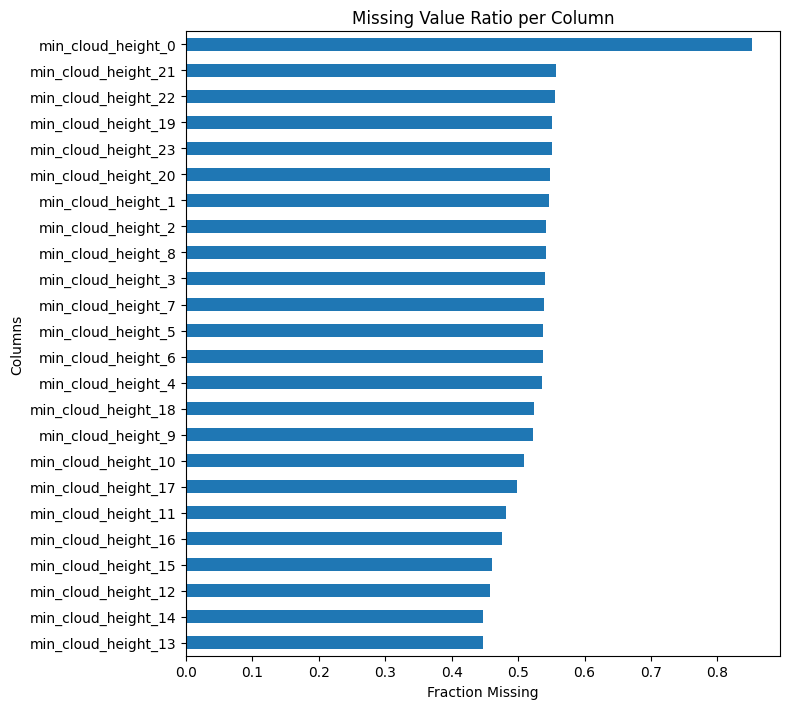

In [352]:
# min_cloud_height_의 결측치 체크
def drop_columns(c):
    return [f'{c}_{i}' for i in range(0,24)]
columns = drop_columns('min_cloud_height')
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('train_dataset.csv')
na_ratio = df[columns].isna().sum(axis=0) / df.shape[0]

plt.figure(figsize=(8, len(na_ratio) * 0.3))
na_ratio.sort_values().plot(kind='barh')
plt.title('Missing Value Ratio per Column')
plt.xlabel('Fraction Missing')
plt.ylabel('Columns')
plt.tight_layout()
plt.show()

In [305]:
# 1. train_df를 전처리 함수에 넣어서 처리
train_df_01 = preprocess_weather_data(train_df)

# 2. 전처리된 결과를 CSV 파일로 저장
train_df_01.to_csv('train_01.csv', index=False, encoding='utf-8-sig')

# 3. 완료 메시지 출력
print("전처리 완료된 train_df_01를 train_01.csv로 저장했습니다!")


전처리 완료된 train_df_01를 train_01.csv로 저장했습니다!


In [306]:
# 1. test_df를 전처리 함수에 넣어서 처리
test_df_01 = preprocess_weather_data(test_df)


# 2. 전처리된 결과를 CSV 파일로 저장
test_df_01.to_csv('test_01.csv', index=False, encoding='utf-8-sig')

# 3. 완료 메시지 출력
print("전처리 완료된 test_df_01를 train_01.csv로 저장했습니다!")

전처리 완료된 test_df_01를 train_01.csv로 저장했습니다!


### 여기부터는 전처리 후 !!

In [307]:
train_df_01.head()

,id,station,station_name,date,cloud_cover_0,cloud_cover_1,cloud_cover_10,cloud_cover_11,cloud_cover_12,cloud_cover_13,...,wind_speed_23,wind_speed_3,wind_speed_4,wind_speed_5,wind_speed_6,wind_speed_7,wind_speed_8,wind_speed_9,climatology_temp,target
0,0,98,동두천,01-01,0.0,0.0,9.0,0.0,3.0,3.0,...,2.3,0.6,0.3,0.7,0.6,0.7,0.8,0.1,-2.707143,-3.992857
1,1,98,동두천,01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,0.7,0.2,0.0,1.1,1.3,0.5,0.9,0.4,-3.646429,-1.653571
2,2,98,동두천,01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4,1.5,0.8,0.8,0.9,1.0,1.1,0.1,-2.694643,-0.005357
3,3,98,동두천,01-04,0.0,0.0,2.0,0.0,0.0,1.0,...,0.9,0.3,0.5,0.2,0.5,1.3,0.5,0.2,-2.501786,-0.898214
4,4,98,동두천,01-05,0.0,0.0,0.0,0.0,0.0,0.0,...,1.4,1.1,1.6,1.4,1.8,0.5,1.1,0.6,-2.625000,-1.775000


In [308]:
train_df_01.isnull().sum()[train_df_01.isnull().sum() > 0]


,0
wind_direction_0,3
wind_direction_1,3
wind_direction_10,3
wind_direction_11,3
wind_direction_12,3
wind_direction_13,3
wind_direction_14,3
wind_direction_15,3
wind_direction_16,3
wind_direction_17,3


In [309]:
train_df_01['month'] = train_df_01['date'].str.slice(0, 2).astype(int)

<ipython-input-309-10b0bafcefea>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df_01['month'] = train_df_01['date'].str.slice(0, 2).astype(int)


In [310]:
train_df_01 = train_df_01.dropna()

In [311]:
train_df_01.isnull().sum()[train_df_01.isnull().sum() > 0]

,0


In [312]:
test_df_01.isnull().sum()[test_df_01.isnull().sum() > 0]

,0
dew_point_0,1
dew_point_1,1
dew_point_10,1
dew_point_11,1
dew_point_12,1
...,...
visibility_5,18
visibility_6,18
visibility_7,18
visibility_8,18


In [313]:
# 1. '월' 정보 추출 (앞 2자리 MM → 정수형)
test_df_01['month'] = test_df_01['date'].str.slice(0, 2).astype(int)

# 2. 처리할 접두어 리스트
prefixes = [
    'cloud_cover_', 'dew_point_', 'humidity_', 'local_pressure_', 'precipitation_',
    'sea_level_pressure_', 'snow_depth_', 'sunshine_duration_', 'surface_temp_',
    'vapor_pressure_', 'visibility_', 'wind_speed_', 'wind_direction_'
]

# 3. 접두어별로 하나씩 처리
for prefix in prefixes:
    # 해당 prefix로 시작하고 결측치가 있는 열만 추출
    null_cols = test_df_01.columns[test_df_01.isnull().sum() > 0]
    target_cols = [col for col in null_cols if col.startswith(prefix)]

    for col in target_cols:
        missing_idx = test_df_01[test_df_01[col].isnull()].index

        for idx in missing_idx:
            month_val = test_df_01.loc[idx, 'month']

            if pd.isna(month_val):
                print(f"⚠️ index {idx}: 'month' 값 없음 → 건너뜀")
                continue

            mean_val = test_df_01.loc[
                (test_df_01['month'] == month_val) & (test_df_01[col].notnull()), col
            ].mean()

            if pd.isna(mean_val):
                print(f"⚠️ {col}의 {month_val}월 평균 없음 → 건너뜀")
                continue

            test_df_01.at[idx, col] = mean_val


<ipython-input-313-57cdf2c80d22>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df_01['month'] = test_df_01['date'].str.slice(0, 2).astype(int)


In [314]:
test_df_01.isnull().sum()[test_df_01.isnull().sum() > 0]

,0


In [315]:
# train_df_01.drop(columns='month', inplace=True)
# test_df_01.drop(columns='month', inplace=True)
# month 살리는게 성능이 더 좋았음

## 여기부터 df들은 결측치가 없다!! >> train_df_01, test_df_01:

In [316]:
def generate_weather_features(df):

    # 일평균 기온
    temp_cols = [f'surface_temp_{i}' for i in range(24) if f'surface_temp_{i}' in df.columns]
    df['avg_temp'] = df[temp_cols].mean(axis=1)

    # 일교차
    df['temp_range'] = df[temp_cols].max(axis=1) - df[temp_cols].min(axis=1)

    # 총 강수량
    rain_cols = [f'precipitation_{i}' for i in range(24) if f'precipitation_{i}' in df.columns]
    df['total_rainfall'] = df[rain_cols].sum(axis=1)

    # 저시정시간 수
    vis_cols = [f'visibility_{i}' for i in range(24) if f'visibility_{i}' in df.columns]
    df['low_visibility_hours'] = (df[vis_cols] < 1).sum(axis=1)

    return df


In [317]:
generate_weather_features(train_df_01)
generate_weather_features(test_df_01)

<ipython-input-316-d2885eec7570>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['avg_temp'] = df[temp_cols].mean(axis=1)
<ipython-input-316-d2885eec7570>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['temp_range'] = df[temp_cols].max(axis=1) - df[temp_cols].min(axis=1)
<ipython-input-316-d2885eec7570>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.

,id,station,station_name,date,cloud_cover_0,cloud_cover_1,cloud_cover_10,cloud_cover_11,cloud_cover_12,cloud_cover_13,...,wind_speed_6,wind_speed_7,wind_speed_8,wind_speed_9,climatology_temp,month,avg_temp,temp_range,total_rainfall,low_visibility_hours
0,0,119,수원,08-27,6.0,7.0,8.0,9.0,9.0,9.0,...,0.8,0.4,0.5,1.4,24.017857,8,26.612500,6.2,0.1,0
1,1,99,파주,11-28,0.0,0.0,0.0,0.0,0.0,0.0,...,0.3,0.7,1.2,0.2,1.778571,11,0.387500,10.4,0.0,0
2,2,99,파주,07-07,0.0,0.0,0.0,2.0,1.0,4.0,...,0.3,1.2,0.8,1.1,24.091071,7,27.279167,15.8,0.0,0
3,3,99,파주,08-14,0.0,0.0,0.0,0.0,0.0,1.0,...,0.6,1.8,2.9,1.2,27.076786,8,33.554167,22.3,0.0,0
4,4,99,파주,03-17,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4,1.2,0.6,1.8,7.417857,3,8.725000,27.9,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,2999,119,수원,12-02,0.0,6.0,2.0,9.0,5.0,7.0,...,1.0,1.3,1.1,1.1,1.932143,12,2.841667,12.5,0.0,0
3000,3000,99,파주,04-01,0.0,0.0,0.0,0.0,0.0,1.0,...,0.6,0.6,0.3,0.6,12.312500,4,6.583333,25.1,0.0,0
3001,3001,119,수원,07-24,2.0,1.0,7.0,7.0,7.0,7.0,...,3.2,3.2,3.2,2.4,27.073214,7,21.850000,11.6,1.6,0
3002,3002,119,수원,05-21,10.0,9.0,8.0,8.0,5.0,4.0,...,0.4,1.3,1.3,2.3,18.208929,5,25.062500,24.1,0.0,0


<Axes: >

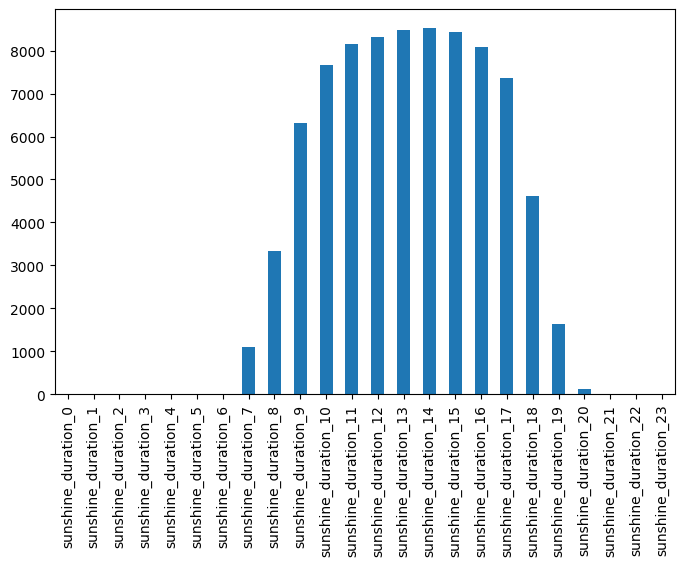

In [350]:
# night_sunshine_hours 체크

def drop_columns(c):
    return [f'{c}_{i}' for i in range(0,24)]
columns = drop_columns('sunshine_duration')
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('train_dataset.csv')
df[columns].sum(axis=0).plot(
    kind='bar',
    x='col1',
    y='col2',
    figsize=(8,5),
    legend=False
)

In [348]:
def drop_night_sunshine_hours(df):
    """
    DataFrame에서 0~6시, 21~23시의 sunshine_duration 열을 직접 삭제합니다.
    """
    night_hours = list(range(0, 7)) + list(range(21, 24))
    drop_cols = [f'sunshine_duration_{i}' for i in night_hours]
    drop_cols = [col for col in drop_cols if col in df.columns]

    df.drop(columns=drop_cols, inplace=True)


In [349]:
drop_night_sunshine_hours(train_df_01)
drop_night_sunshine_hours(test_df_01)

In [320]:
def generate_wind_features(df):
    """

    생성되는 변수:
    - mean_wind_speed: 하루 평균 풍속
    - max_wind_speed: 하루 최대 풍속
    - std_wind_speed: 하루 풍속의 표준편차 (변동성)
    - wind_speed_diff: 최대풍속 - 최소풍속 (변동폭)

    Parameters:
        df (pd.DataFrame): 풍속 열이 포함된 데이터프레임

    Returns:
        pd.DataFrame: 파생변수가 추가된 데이터프레임
    """
    # 1. wind_speed_* 열만 추출
    wind_cols = [col for col in df.columns if col.startswith('wind_speed_')]

    if not wind_cols:
        print("⚠️ wind_speed_ 열이 없습니다.")
        return df

    # 2. 파생변수 생성
    df['mean_wind_speed'] = df[wind_cols].mean(axis=1)
    df['max_wind_speed'] = df[wind_cols].max(axis=1)
    df['std_wind_speed'] = df[wind_cols].std(axis=1)
    df['wind_speed_diff'] = df[wind_cols].max(axis=1) - df[wind_cols].min(axis=1)

    return df


In [321]:
generate_wind_features(train_df_01)
generate_wind_features(test_df_01)

<ipython-input-320-770cf3482b1e>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['mean_wind_speed'] = df[wind_cols].mean(axis=1)
<ipython-input-320-770cf3482b1e>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['max_wind_speed'] = df[wind_cols].max(axis=1)
<ipython-input-320-770cf3482b1e>:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

,id,station,station_name,date,cloud_cover_0,cloud_cover_1,cloud_cover_10,cloud_cover_11,cloud_cover_12,cloud_cover_13,...,climatology_temp,month,avg_temp,temp_range,total_rainfall,low_visibility_hours,mean_wind_speed,max_wind_speed,std_wind_speed,wind_speed_diff
0,0,119,수원,08-27,6.0,7.0,8.0,9.0,9.0,9.0,...,24.017857,8,26.612500,6.2,0.1,0,1.466667,3.3,0.818624,2.9
1,1,99,파주,11-28,0.0,0.0,0.0,0.0,0.0,0.0,...,1.778571,11,0.387500,10.4,0.0,0,0.520833,1.8,0.508176,1.8
2,2,99,파주,07-07,0.0,0.0,0.0,2.0,1.0,4.0,...,24.091071,7,27.279167,15.8,0.0,0,0.579167,1.6,0.426287,1.6
3,3,99,파주,08-14,0.0,0.0,0.0,0.0,0.0,1.0,...,27.076786,8,33.554167,22.3,0.0,0,1.058333,2.9,0.543672,2.5
4,4,99,파주,03-17,0.0,0.0,0.0,0.0,0.0,0.0,...,7.417857,3,8.725000,27.9,0.0,0,1.308333,3.5,0.898751,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,2999,119,수원,12-02,0.0,6.0,2.0,9.0,5.0,7.0,...,1.932143,12,2.841667,12.5,0.0,0,1.679167,3.4,0.731276,3.0
3000,3000,99,파주,04-01,0.0,0.0,0.0,0.0,0.0,1.0,...,12.312500,4,6.583333,25.1,0.0,0,1.854167,4.6,1.420036,4.4
3001,3001,119,수원,07-24,2.0,1.0,7.0,7.0,7.0,7.0,...,27.073214,7,21.850000,11.6,1.6,0,3.191667,6.1,1.296791,5.0
3002,3002,119,수원,05-21,10.0,9.0,8.0,8.0,5.0,4.0,...,18.208929,5,25.062500,24.1,0.0,0,1.937500,3.5,0.783977,3.1


In [322]:
def generate_sunshine_features(df):
    """

    생성되는 변수:
    - total_sunshine_duration: 하루 일조량 총합
    - max_sunshine_duration: 시간대별 최대 일조량
    - sunshine_hour_count: 햇빛이 있었던 시간 수 (일조량 > 0)

    Returns:
        pd.DataFrame: 파생변수가 추가되고 기존 일조량 열이 제거된 DataFrame
    """

    # 1. sunshine_duration_* 열 찾기
    sun_cols = [col for col in df.columns if col.startswith('sunshine_duration_')]

    if not sun_cols:
        print("⚠️ sunshine_duration_ 열이 없습니다.")
        return df

    # 2. 파생변수 생성
    df['total_sunshine_duration'] = df[sun_cols].sum(axis=1)
    df['max_sunshine_duration'] = df[sun_cols].max(axis=1)
    df['sunshine_hour_count'] = (df[sun_cols] > 0).sum(axis=1)

    return df


In [323]:
generate_sunshine_features(train_df_01)
generate_sunshine_features(test_df_01)

<ipython-input-322-9b85c01042b6>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['total_sunshine_duration'] = df[sun_cols].sum(axis=1)
<ipython-input-322-9b85c01042b6>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['max_sunshine_duration'] = df[sun_cols].max(axis=1)
<ipython-input-322-9b85c01042b6>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

,id,station,station_name,date,cloud_cover_0,cloud_cover_1,cloud_cover_10,cloud_cover_11,cloud_cover_12,cloud_cover_13,...,temp_range,total_rainfall,low_visibility_hours,mean_wind_speed,max_wind_speed,std_wind_speed,wind_speed_diff,total_sunshine_duration,max_sunshine_duration,sunshine_hour_count
0,0,119,수원,08-27,6.0,7.0,8.0,9.0,9.0,9.0,...,6.2,0.1,0,1.466667,3.3,0.818624,2.9,2.8,1.0,5
1,1,99,파주,11-28,0.0,0.0,0.0,0.0,0.0,0.0,...,10.4,0.0,0,0.520833,1.8,0.508176,1.8,8.0,1.0,9
2,2,99,파주,07-07,0.0,0.0,0.0,2.0,1.0,4.0,...,15.8,0.0,0,0.579167,1.6,0.426287,1.6,5.8,1.0,11
3,3,99,파주,08-14,0.0,0.0,0.0,0.0,0.0,1.0,...,22.3,0.0,0,1.058333,2.9,0.543672,2.5,9.2,1.0,11
4,4,99,파주,03-17,0.0,0.0,0.0,0.0,0.0,0.0,...,27.9,0.0,0,1.308333,3.5,0.898751,3.4,10.9,1.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,2999,119,수원,12-02,0.0,6.0,2.0,9.0,5.0,7.0,...,12.5,0.0,0,1.679167,3.4,0.731276,3.0,5.1,1.0,6
3000,3000,99,파주,04-01,0.0,0.0,0.0,0.0,0.0,1.0,...,25.1,0.0,0,1.854167,4.6,1.420036,4.4,11.1,1.0,13
3001,3001,119,수원,07-24,2.0,1.0,7.0,7.0,7.0,7.0,...,11.6,1.6,0,3.191667,6.1,1.296791,5.0,0.9,0.4,4
3002,3002,119,수원,05-21,10.0,9.0,8.0,8.0,5.0,4.0,...,24.1,0.0,0,1.937500,3.5,0.783977,3.1,8.2,1.0,11


In [324]:
def generate_cloud_cover_features(df, threshold=6):
  # threshold = 5,6,7,8,9를 해봤을 때 6이 제일 성능이 높았음
    """
    cloud_cover_0 ~ cloud_cover_23를 기반으로 구름량 파생변수를 생성하고
    기존 시간별 열을 삭제합니다.

    생성되는 변수:
    - mean_cloud_cover: 평균 구름량
    - max_cloud_cover: 최대 구름량
    - cloudy_hour_count: 구름량이 threshold 이상인 시간 수

    Parameters:
        df (pd.DataFrame): cloud_cover 열이 포함된 DataFrame
        threshold (int): 구름이 많다고 판단할 기준값 (기본값: 5)

    Returns:
        pd.DataFrame: 파생변수가 추가되고 원본 열이 제거된 DataFrame
    """

    # 1. cloud_cover_ 열 추출
    cloud_cols = [col for col in df.columns if col.startswith('cloud_cover_')]

    if not cloud_cols:
        print("⚠️ cloud_cover_ 열이 없습니다.")
        return df

    # 2. 파생변수 생성
    df['mean_cloud_cover'] = df[cloud_cols].mean(axis=1)
    df['max_cloud_cover'] = df[cloud_cols].max(axis=1)
    df['cloudy_hour_count'] = (df[cloud_cols] >= threshold).sum(axis=1)

    # 3. 기존 열 삭제  >> 삭제하지 않았을 때 보다 성능이 좋았음 0.0001상승..
    df.drop(columns=cloud_cols, inplace=True)

    return df


In [325]:
generate_cloud_cover_features(train_df_01)
generate_cloud_cover_features(test_df_01)

<ipython-input-324-1a059f245bb4>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['mean_cloud_cover'] = df[cloud_cols].mean(axis=1)
<ipython-input-324-1a059f245bb4>:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['max_cloud_cover'] = df[cloud_cols].max(axis=1)
<ipython-input-324-1a059f245bb4>:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a d

,id,station,station_name,date,dew_point_0,dew_point_1,dew_point_10,dew_point_11,dew_point_12,dew_point_13,...,mean_wind_speed,max_wind_speed,std_wind_speed,wind_speed_diff,total_sunshine_duration,max_sunshine_duration,sunshine_hour_count,mean_cloud_cover,max_cloud_cover,cloudy_hour_count
0,0,119,수원,08-27,22.9,22.8,21.3,20.2,20.6,20.8,...,1.466667,3.3,0.818624,2.9,2.8,1.0,5,4.416667,9.0,12
1,1,99,파주,11-28,-5.9,-6.1,-4.3,-3.7,-3.8,-3.7,...,0.520833,1.8,0.508176,1.8,8.0,1.0,9,1.250000,7.0,2
2,2,99,파주,07-07,19.8,19.9,21.9,22.1,23.7,22.7,...,0.579167,1.6,0.426287,1.6,5.8,1.0,11,3.125000,8.0,7
3,3,99,파주,08-14,25.8,25.8,26.6,27.1,26.2,27.4,...,1.058333,2.9,0.543672,2.5,9.2,1.0,11,1.875000,7.0,5
4,4,99,파주,03-17,-4.5,-4.4,-2.2,-2.3,-1.9,-1.7,...,1.308333,3.5,0.898751,3.4,10.9,1.0,12,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,2999,119,수원,12-02,-8.6,-7.3,-9.0,-7.5,-6.6,-6.4,...,1.679167,3.4,0.731276,3.0,5.1,1.0,6,4.750000,10.0,11
3000,3000,99,파주,04-01,-9.2,-7.9,-7.5,-9.0,-10.4,-8.6,...,1.854167,4.6,1.420036,4.4,11.1,1.0,13,1.250000,8.0,2
3001,3001,119,수원,07-24,18.2,17.6,17.8,17.7,18.1,19.6,...,3.191667,6.1,1.296791,5.0,0.9,0.4,4,6.250000,9.0,18
3002,3002,119,수원,05-21,14.3,14.2,15.6,13.7,14.2,14.1,...,1.937500,3.5,0.783977,3.1,8.2,1.0,11,5.000000,10.0,12


In [326]:
def generate_snow_summary(df):
    """
    snow_depth_0 ~ snow_depth_23 열을 기반으로:
    - total_snow_depth: 하루 적설량 총합
    - snow_duration: 눈이 쌓여 있던 시간 수

    """
    snow_cols = [f'snow_depth_{i}' for i in range(24) if f'snow_depth_{i}' in df.columns]

    if not snow_cols:
        print("⚠️ snow_depth_ 열이 없습니다.")
        return df

    df['total_snow_depth'] = df[snow_cols].sum(axis=1)
    df['snow_duration'] = (df[snow_cols] > 0).sum(axis=1)

    df.drop(columns=snow_cols, inplace=True)


    return df


In [327]:
generate_snow_summary(train_df_01)
generate_snow_summary(test_df_01)

<ipython-input-326-676f195f855f>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['total_snow_depth'] = df[snow_cols].sum(axis=1)
<ipython-input-326-676f195f855f>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['snow_duration'] = (df[snow_cols] > 0).sum(axis=1)
<ipython-input-326-676f195f855f>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a 

,id,station,station_name,date,dew_point_0,dew_point_1,dew_point_10,dew_point_11,dew_point_12,dew_point_13,...,std_wind_speed,wind_speed_diff,total_sunshine_duration,max_sunshine_duration,sunshine_hour_count,mean_cloud_cover,max_cloud_cover,cloudy_hour_count,total_snow_depth,snow_duration
0,0,119,수원,08-27,22.9,22.8,21.3,20.2,20.6,20.8,...,0.818624,2.9,2.8,1.0,5,4.416667,9.0,12,0.0,0
1,1,99,파주,11-28,-5.9,-6.1,-4.3,-3.7,-3.8,-3.7,...,0.508176,1.8,8.0,1.0,9,1.250000,7.0,2,0.0,0
2,2,99,파주,07-07,19.8,19.9,21.9,22.1,23.7,22.7,...,0.426287,1.6,5.8,1.0,11,3.125000,8.0,7,0.0,0
3,3,99,파주,08-14,25.8,25.8,26.6,27.1,26.2,27.4,...,0.543672,2.5,9.2,1.0,11,1.875000,7.0,5,0.0,0
4,4,99,파주,03-17,-4.5,-4.4,-2.2,-2.3,-1.9,-1.7,...,0.898751,3.4,10.9,1.0,12,0.000000,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,2999,119,수원,12-02,-8.6,-7.3,-9.0,-7.5,-6.6,-6.4,...,0.731276,3.0,5.1,1.0,6,4.750000,10.0,11,0.0,0
3000,3000,99,파주,04-01,-9.2,-7.9,-7.5,-9.0,-10.4,-8.6,...,1.420036,4.4,11.1,1.0,13,1.250000,8.0,2,0.0,0
3001,3001,119,수원,07-24,18.2,17.6,17.8,17.7,18.1,19.6,...,1.296791,5.0,0.9,0.4,4,6.250000,9.0,18,0.0,0
3002,3002,119,수원,05-21,14.3,14.2,15.6,13.7,14.2,14.1,...,0.783977,3.1,8.2,1.0,11,5.000000,10.0,12,0.0,0


In [328]:
def generate_precipitation_summary(df):
    """
    강수량 (precipitation_0 ~ precipitation_23) 열을 기반으로:
    - total_precipitation: 하루 강수량 총합
    - precipitation_duration: 강수량이 기록된 시간 수 (0보다 큰 시간)

    Parameters:
    - df (DataFrame): 강수량 데이터프레임

    Returns:
    - DataFrame: 강수량 요약 열이 추가된 데이터프레임
    """
    # 강수량 열 탐지
    precipitation_cols = [col for col in df.columns if col.startswith('precipitation_')]

    if not precipitation_cols:
        print("⚠️ precipitation_ 열이 없습니다.")
        return df

    df['total_precipitation'] = df[precipitation_cols].sum(axis=1)
    df['precipitation_duration'] = (df[precipitation_cols] > 0).sum(axis=1)

    df.drop(columns=precipitation_cols, inplace=True)

    return df

In [329]:
generate_precipitation_summary(train_df_01)
generate_precipitation_summary(test_df_01)

<ipython-input-328-ec86a31cd25e>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['total_precipitation'] = df[precipitation_cols].sum(axis=1)
<ipython-input-328-ec86a31cd25e>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['precipitation_duration'] = (df[precipitation_cols] > 0).sum(axis=1)
<ipython-input-328-ec86a31cd25e>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.con

,id,station,station_name,date,dew_point_0,dew_point_1,dew_point_10,dew_point_11,dew_point_12,dew_point_13,...,total_sunshine_duration,max_sunshine_duration,sunshine_hour_count,mean_cloud_cover,max_cloud_cover,cloudy_hour_count,total_snow_depth,snow_duration,total_precipitation,precipitation_duration
0,0,119,수원,08-27,22.9,22.8,21.3,20.2,20.6,20.8,...,2.8,1.0,5,4.416667,9.0,12,0.0,0,0.1,1
1,1,99,파주,11-28,-5.9,-6.1,-4.3,-3.7,-3.8,-3.7,...,8.0,1.0,9,1.250000,7.0,2,0.0,0,0.0,0
2,2,99,파주,07-07,19.8,19.9,21.9,22.1,23.7,22.7,...,5.8,1.0,11,3.125000,8.0,7,0.0,0,0.0,0
3,3,99,파주,08-14,25.8,25.8,26.6,27.1,26.2,27.4,...,9.2,1.0,11,1.875000,7.0,5,0.0,0,0.0,0
4,4,99,파주,03-17,-4.5,-4.4,-2.2,-2.3,-1.9,-1.7,...,10.9,1.0,12,0.000000,0.0,0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,2999,119,수원,12-02,-8.6,-7.3,-9.0,-7.5,-6.6,-6.4,...,5.1,1.0,6,4.750000,10.0,11,0.0,0,0.0,0
3000,3000,99,파주,04-01,-9.2,-7.9,-7.5,-9.0,-10.4,-8.6,...,11.1,1.0,13,1.250000,8.0,2,0.0,0,0.0,0
3001,3001,119,수원,07-24,18.2,17.6,17.8,17.7,18.1,19.6,...,0.9,0.4,4,6.250000,9.0,18,0.0,0,1.6,5
3002,3002,119,수원,05-21,14.3,14.2,15.6,13.7,14.2,14.1,...,8.2,1.0,11,5.000000,10.0,12,0.0,0,0.0,0


In [330]:
# 불필요한 컬럼 삭제
def drop(df):
  drop_cols = [ 'station_name', 'date', 'station']
  df.drop(columns=drop_cols, inplace=True)


In [331]:
drop(train_df_01)
train_df_01 = train_df_01.drop(columns=['id'])

In [332]:
def preprocess_and_split(train_df, test_size=0.3, random_state=42):
    # 1. target 분리
    train_target = train_df['target']
    train_features = train_df.drop(columns=['target'])

    # 3. train-validation 나누기 (7:3 비율)
    X_train, X_val, y_train, y_val = train_test_split(
        train_features, train_target,
        test_size=test_size,
        random_state=random_state
    )

    return X_train, X_val, y_train, y_val


In [333]:
X_train, X_val, y_train, y_val = preprocess_and_split(train_df_01)

#  선형회귀 모델 만들기
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 검증 데이터에 대해 예측
y_pred = model.predict(X_val)

# 모델 평가
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# 결과 출력
print(f"검증 데이터 MSE (평균제곱오차): {mse:.4f}")
print(f"검증 데이터 R2 Score (결정계수): {r2:.4f}")

검증 데이터 MSE (평균제곱오차): 2.9996
검증 데이터 R2 Score (결정계수): 0.6662


In [334]:
test_df_01.head()

,id,station,station_name,date,dew_point_0,dew_point_1,dew_point_10,dew_point_11,dew_point_12,dew_point_13,...,total_sunshine_duration,max_sunshine_duration,sunshine_hour_count,mean_cloud_cover,max_cloud_cover,cloudy_hour_count,total_snow_depth,snow_duration,total_precipitation,precipitation_duration
0,0,119,수원,08-27,22.9,22.8,21.3,20.2,20.6,20.8,...,2.8,1.0,5,4.416667,9.0,12,0.0,0,0.1,1
1,1,99,파주,11-28,-5.9,-6.1,-4.3,-3.7,-3.8,-3.7,...,8.0,1.0,9,1.250000,7.0,2,0.0,0,0.0,0
2,2,99,파주,07-07,19.8,19.9,21.9,22.1,23.7,22.7,...,5.8,1.0,11,3.125000,8.0,7,0.0,0,0.0,0
3,3,99,파주,08-14,25.8,25.8,26.6,27.1,26.2,27.4,...,9.2,1.0,11,1.875000,7.0,5,0.0,0,0.0,0
4,4,99,파주,03-17,-4.5,-4.4,-2.2,-2.3,-1.9,-1.7,...,10.9,1.0,12,0.000000,0.0,0,0.0,0,0.0,0


In [335]:
drop(test_df_01)

In [336]:
# 1. test_df_01 전처리 전, 'id', 'target' 열 제거
test_ids = test_df_01['id']
# 모두 공통인 test_features
test_features = test_df_01.drop(columns=['id'], errors='ignore')

# 7. Test 데이터 예측
test_pred = model.predict(test_features)

In [337]:
print(type(y_pred))       # <class 'pandas.core.series.Series'>
print(type(test_pred))    # <class 'numpy.ndarray'>


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [338]:
# 8. 결과를 DataFrame으로 저장
submission = pd.DataFrame({
    'id': test_ids,
    'target': test_pred
})

# 9. CSV 파일로 저장
submission.to_csv('sub.csv', index=False)
print("제출 파일 저장 완료: sub_neighbors.csv")


제출 파일 저장 완료: sub_neighbors.csv


In [339]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

train_df_lasso = train_df_01.copy()

#  데이터 분리
X_train, X_val, y_train, y_val = preprocess_and_split(train_df_lasso)

#  Lasso 모델의 최적 alpha 찾기 (Grid Search)
lasso = Lasso(random_state=42)
param_grid = {'alpha': np.logspace(-5, 1, 50)}  # 10^-5 ~ 10^1 범위
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

#  최적의 alpha 값 확인
best_alpha = grid_search.best_params_['alpha']
print(f" 최적의 Lasso alpha 값: {best_alpha:.6f}")

# 최적의 Lasso 모델 생성
lasso_best = Lasso(alpha=best_alpha, random_state=42)
lasso_best.fit(X_train, y_train)

#  검증 데이터 예측
y_pred = lasso_best.predict(X_val)

# 성능 평가
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f" 최적의 Lasso 회귀 모델 검증 데이터 MSE (평균제곱오차): {mse:.4f}")
print(f" 최적의 Lasso 회귀 모델 검증 데이터 R2 Score (결정계수): {r2:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.033e+04, tolerance: 6.330e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.033e+04, tolerance: 6.287e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.032e+04, tolerance: 6.488e

 최적의 Lasso alpha 값: 0.026827
 최적의 Lasso 회귀 모델 검증 데이터 MSE (평균제곱오차): 3.1212
 최적의 Lasso 회귀 모델 검증 데이터 R2 Score (결정계수): 0.6526


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.257e+04, tolerance: 7.967e+00
  model = cd_fast.enet_coordinate_descent(


In [340]:
test_pred = lasso_best.predict(test_features)

#  결과를 DataFrame으로 저장
submission = pd.DataFrame({
    'id': test_ids,
    'target': test_pred
})

#  CSV 파일로 저장
submission.to_csv('sub_best_lasso.csv', index=False)
print(" 제출 파일 저장 완료: sub_best_lasso.csv")

 제출 파일 저장 완료: sub_best_lasso.csv


In [341]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#  데이터 복사
train_df_ridge = train_df_01.copy()

#  데이터 분리
X_train, X_val, y_train, y_val = preprocess_and_split(train_df_ridge)

#  Ridge 모델의 최적 alpha 찾기 (Grid Search)
ridge = Ridge(random_state=42)
param_grid = {'alpha': np.logspace(-5, 1, 50)}  # 10^-5 ~ 10^1 범위
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

#  최적의 alpha 값 확인
best_alpha = grid_search.best_params_['alpha']
print(f" 최적의 Ridge alpha 값: {best_alpha:.6f}")

#  최적의 Ridge 모델 생성
ridge_best = Ridge(alpha=best_alpha, random_state=42)
ridge_best.fit(X_train, y_train)

# 검증 데이터 예측
y_pred = ridge_best.predict(X_val)

#  성능 평가
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f" 최적의 Ridge 회귀 모델 검증 데이터 MSE (평균제곱오차): {mse:.4f}")
print(f" 최적의 Ridge 회귀 모델 검증 데이터 R2 Score (결정계수): {r2:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.30954e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.29526e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.25896e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.29211e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarnin

 최적의 Ridge alpha 값: 10.000000
 최적의 Ridge 회귀 모델 검증 데이터 MSE (평균제곱오차): 3.0010
 최적의 Ridge 회귀 모델 검증 데이터 R2 Score (결정계수): 0.6660


In [342]:

#  Test 데이터 예측 (최적의 Ridge 모델 사용)
test_pred = ridge_best.predict(test_features)

# 결과를 DataFrame으로 저장
submission = pd.DataFrame({
    'id': test_ids,
    'target': test_pred
})

# CSV 파일로 저장
submission.to_csv('sub_best_ridge.csv', index=False)
print(" 제출 파일 저장 완료: sub_best_ridge.csv")


 제출 파일 저장 완료: sub_best_ridge.csv


In [343]:
pip install -U xgboost


In [344]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

#  Train 데이터 DMatrix로 변환 (XGBoost 전용)
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

#  XGBoost 모델 설정 (xgb.train)
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# xgb.train으로 학습 (조기 종료 적용)
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=500,
    evals=[(dval, 'validation')],
    early_stopping_rounds=50,
    verbose_eval=True
)

# 검증 데이터 예측
y_pred = xgb_model.predict(dval)

# 성능 평가
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f" XGBoost 모델 검증 데이터 MSE: {mse:.4f}")
print(f" XGBoost 모델 검증 데이터 R2 Score: {r2:.4f}")


[0]	validation-rmse:2.95993
[1]	validation-rmse:2.90959
[2]	validation-rmse:2.86194
[3]	validation-rmse:2.82591
[4]	validation-rmse:2.78433
[5]	validation-rmse:2.74488
[6]	validation-rmse:2.70649
[7]	validation-rmse:2.67145
[8]	validation-rmse:2.63626
[9]	validation-rmse:2.60954
[10]	validation-rmse:2.57325
[11]	validation-rmse:2.54921
[12]	validation-rmse:2.52031
[13]	validation-rmse:2.49439
[14]	validation-rmse:2.46559
[15]	validation-rmse:2.43763
[16]	validation-rmse:2.41112
[17]	validation-rmse:2.38664
[18]	validation-rmse:2.36331
[19]	validation-rmse:2.34164
[20]	validation-rmse:2.32280
[21]	validation-rmse:2.30266
[22]	validation-rmse:2.28409
[23]	validation-rmse:2.26512
[24]	validation-rmse:2.24641
[25]	validation-rmse:2.23255
[26]	validation-rmse:2.22129
[27]	validation-rmse:2.20805
[28]	validation-rmse:2.19582
[29]	validation-rmse:2.18012
[30]	validation-rmse:2.16831
[31]	validation-rmse:2.15597
[32]	validation-rmse:2.14651
[33]	validation-rmse:2.13827
[34]	validation-rmse:2.1

In [345]:
# Test 데이터 DMatrix로 변환
dtest = xgb.DMatrix(test_features)

# Test 데이터 예측
test_pred = xgb_model.predict(dtest)

# 결과를 DataFrame으로 저장
submission = pd.DataFrame({
    'id': test_ids,
    'target': test_pred
})

# CSV 파일로 저장
submission.to_csv('sub_xgboost.csv', index=False)
print(" 제출 파일 저장 완료: sub_xgboost.csv")


 제출 파일 저장 완료: sub_xgboost.csv
